Vector Autoregressive (VAR)

Stimare un modello Vector Autoregressive per determinare l'effetto delle concorrenti sui titoli azionari delle compagnie analizzate. Commentare i risultati.

Definiamo un modello VAR(p)

$y_t=\nu+A_{1}y_{t-1}+...+A_py_{t-p}+u_t$

dove $A_i$ sono matrici di coefficienti $KxK$, $\nu$ rappresenta il vettore delle intercette e $u_t$ un WN con matrice non singolare di covarianza $\Sigma$.

Anche $y_t$ è un vettore. Nel nostro caso trivariato avremo:

$\begin{pmatrix}y_{1t}\\y_{2t}\\y_{3,t}\end{pmatrix}=\begin{pmatrix}\nu_1\\\nu_2\\\nu_3\end{pmatrix}+\begin{pmatrix}a_{1,1} a_{1,2} a_{1,3}\\a_{2,1} a_{2,2} a_{2,3}\\a_{3,1} a_{3,2} a_{3,3}\end{pmatrix}\begin{pmatrix}y_{1,t-1}\\y_{2,t-1}\\y_{3,t-1}\end{pmatrix}+\begin{pmatrix}u_{1,t}\\u_{2,t}\\u_{3,t}\end{pmatrix}$

Dunque

\begin{eqnarray}
y_{1,t}&=&\nu_1+a_{1,1}y_{1,t-1}+a_{1,2}y_{2,t-1}+a_{1,3}y_{3,t-1}+u_{1,t}\\
y_{2,t}&=&\nu_2+a_{2,1}y_{1,t-1}+a_{2,2}y_{2,t-1}+a_{2,3}y_{3,t-1}+u_{2,t}\\
y_{3,t}&=&\nu_3+a_{3,1}y_{1,t-1}+a_{3,2}y_{2,t-1}+a_{3,3}y_{3,t-1}+u_{3,t}\\
\end{eqnarray}

con $cov(u_{it},u_{js})=\sigma_{ij}$ solo quando $t=s$ e $0$ altrimenti.

Andiamo a definire la matrice $Y$ con le osservazioni tra [t+1,T] ed esprimiamo la sua dipendenza dal passato tramite la matrice $X$ contenente le osservazioni [t,T-1] precedute da un vettore di $1$.

$Y=\begin{pmatrix}y_{1,t+1} \ y_{2,t+1}\ y_{3,t+1}\\... \ ... \ ...\\y_{1,T} \ y_{2,T} \ y_{3,T}\end{pmatrix}$

$X=\begin{pmatrix}1 \ y_{1,t} \ y_{2,t} \ y_{3,t}\\
1 \ y_{1,t+1} \ y_{2,t+1} \ y_{3,t+1}\\... ... ...\\
1 \ y_{1,T-1} \ y_{2,T-1} \ y_{3,T-1}
\end{pmatrix}$

Il risultato della stima consiste in una matrice $b$ contenente il vettore delle intercette e la matrice $A$ costituita dai tre vettori dei parametri per ciascuna banca.

$b=[\nu,a_{1},a_{2},a_{3}]$

A questo si aggiunge la matrice  dei residui Normali:

$u=[u_1,u_2,...,u_3]$

Sinteticamente:

$Y=Xb+u$

e dunque lo stimatore OLS  è dato da:

$\hat{b}=(X'X)^{-1}X'Y$

In [1]:
import pandas as pd
import numpy as np

### IMPORT DATA
usiamo la funzione di pandas `read_excel()` per importare il dataset direttamenet in formato `DataFrame`. Esistono molte funzioni per importare un'enormità di tipi diversi di formati. Provate a digitare `pd.read` e vedrete che il suggeritore vi darà molte opzioni!

**WARNING**: La stringa che dovete inserire dentro la funzione `read_excel()` deve essere il percorso che porta al file e dipende da dove lo avete salvato nel vostro pc. Se non riuscite a trovare il percorso, tasto destro sul nome del file, cliccate su proprietà e troverete il path.

In [4]:
Data: pd.DataFrame = pd.read_excel("~/PycharmProjects/Econometrics-Course/Dataset/Banks.xlsx", index_col="Date")
Data.head()

,BPE,ISP,UCG
Date,,,
2000-01-03,13.8982,3.46318,126.932999
2000-01-04,13.8758,3.48982,125.066002
2000-01-05,13.4280,3.43654,121.865997
2000-01-06,13.4280,3.30334,122.133003
2000-01-07,13.5847,3.42766,121.333000


In [5]:
log_ret: pd.DataFrame = np.log(Data).diff().dropna()
log_ret.head()

,BPE,ISP,UCG
Date,,,
2000-01-04,-0.001613,0.007663,-0.014818
2000-01-05,-0.032804,-0.015385,-0.025920
2000-01-06,0.000000,-0.039531,0.002189
2000-01-07,0.011602,0.036944,-0.006572
2000-01-10,0.019587,-0.015666,0.004383


In [6]:
T = log_ret.shape[0]
Y: pd.DataFrame = log_ret.loc['2000-01-05':'2020-11-20',:]
X: pd.DataFrame = log_ret.loc['2000-01-04':'2020-11-19',:]
X['constant'] = 1 
X: pd.DataFrame = X.loc[:, ['constant', 'BPE','ISP', 'UCG']]
X.head()

C:\Users\andre\AppData\Local\Temp\ipykernel_8888\1297447574.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['constant'] = 1


,constant,BPE,ISP,UCG
Date,,,,
2000-01-04,1,-0.001613,0.007663,-0.014818
2000-01-05,1,-0.032804,-0.015385,-0.025920
2000-01-06,1,0.000000,-0.039531,0.002189
2000-01-07,1,0.011602,0.036944,-0.006572
2000-01-10,1,0.019587,-0.015666,0.004383


In [7]:
X = X.to_numpy()
Y = Y.to_numpy()

In [8]:
A_hat = np.linalg.inv(X.transpose() @ X) @ X.transpose() @ Y
print(A_hat.round(4))

[[-4.000e-04 -1.000e-04 -6.000e-04]
 [ 4.600e-03 -2.000e-03  4.270e-02]
 [-1.160e-02  5.000e-03  1.504e-01]
 [ 2.580e-02  3.900e-03 -1.945e-01]]


Structural VAR

Vantaggio principale: tiene conto di interazioni contemporanee. Modelli super usati in macroeconomia.

Il modello (caso bivariato) dunque può essere scritto come:

\begin{eqnarray}
y_{1,t}&=&\gamma_{1,0}+\gamma_{1,2}y_{2,t}+\gamma_{1,1}y_{1,t-1}+\gamma_{1,2}y_{2,t-1}+c_{1}\epsilon_{1,t}\\
y_{2,t}&=&\gamma_{2,0}+\gamma_{2,1}y_{1,t}+\gamma_{2,1}y_{1,t-1}+\gamma_{2,2}y_{2,t-1}+c_{1}\epsilon_{2,t}
\end{eqnarray}

ovvero:

$GY_t=\gamma_0+\Gamma_1y_{t-1}+C\epsilon_t$

$G=\begin{pmatrix}1 \ -g_{1,2} \\ -g_{2,1} \ 1\end{pmatrix}$

$C=\begin{pmatrix}c_{1} \ 0 \\ 0 \ c_{2}\end{pmatrix}$

$\begin{pmatrix}\epsilon_{1,t} \\ \epsilon_{2,t}\end{pmatrix}\sim i.i.d.\begin{pmatrix}\begin{pmatrix}0 \\ 0\end{pmatrix}, D=\begin{pmatrix}\sigma_{1}^2 \ 0 \\ 0 \ \sigma_2^2\end{pmatrix}\end{pmatrix}$

Possiamo riscrivere il problema in forma ridotta come:

$Y_t=G^{-1}\gamma_0+G^{-1}\Gamma_1y_{t-1}+G^{-1}\epsilon_{t},$

ovvero $Y_t=a_0+A_1Y_{t-1}+u_t$

dove $a_0=G^{-1}\gamma_0$, $A_1=G^{-1}\Gamma_{1}$ e $u_t=G^{-1}C\epsilon_t.$

A questo punto si può procedere con la stima OLS di $A_1$. In generale, il problema consiste nello stimare $G$, il che è impossibile univocamente poiché una variazione della $Y_t$ potrebbe essere causato sia da $\epsilon_{1,t}$ che da $\epsilon_{2,t}$ e noi 
osserviamo solo $u_t$.
In questo caso abbiamo:
1. 10 parametri strutturali
2. 9 parametri della forma ridotta.
Abbiamo dunque un problema di identificazione.
Dunque dobbiamo imporre delle restrizioni per identificare il modello.

Un approccio comune consiste nell'assumere una struttura ricorsiva del tipo:
1. $y_{1,t}$ è influenzato solo da $\epsilon_{1,t}$ 
2. $y_{2,t}$ è influenzato da $\epsilon_{1,t}$ e $\epsilon_{2,t}$ 
3. $y_{3,t}$ è influenzato da $\epsilon_{1,t}$, $\epsilon_{2,t}$ e $\epsilon_{3,t}$

In altre parole: l'ultima variabile è influenzata contemporaneamente da tutte le altre variabili, mentre la prima esclusivamente da se stessa.
Dunque, si va ad agire sulla matrice G imponendo restrizioni come:  

$g_{1,2}=0$ e $g_{1,2}+g_{2,1}=0$

Esempio pratico: Real GDP e HICP targati EU.

Importo il dataset GDP contenente le seguenti serie storiche relative a tre Paesi europei (Italia, Francia e Germania), Fonte FRED:
RGDP: Real Gross Domestic Product, Millions of Chained 2010 Euros, Quarterly, Seasonally Adjusted.
HICP: Harmonized Index of Consumer Prices: All Items, Index 2015=100, Quarterly, Not Seasonally Adjusted. 

Per ciascun Paese, possiamo stimare un modello tipo:
, 
dove  indica gli incrementi, con l'obiettivo di ricavare .
Caso ITALIA:
Importo i dati, estraggo i dati relativi all'Italia e li inseriamo in una tabella a parte. Poi calcolo gli incrementi (in log) e plotto.

In [10]:
Data: pd.DataFrame = pd.read_excel("~/PycharmProjects/Econometrics-Course/Dataset/GDP.xlsx", index_col="Date")
Data.head()

,IT_RGDP,FR_RGDP,DE_RGDP,IT_HICP,FR_HICP,DE_HICP
Date,,,,,,
1996-01-01,356815.0,384756.4,533505.8,67.766667,74.483333,75.466667
1996-04-01,357058.7,385708.1,540754.9,68.500000,75.096667,75.700000
1996-07-01,357613.0,387895.4,542636.9,68.666667,74.913333,75.933333
1996-10-01,356554.5,388443.2,546679.6,69.033333,75.236667,75.833333
1997-01-01,357804.5,389762.9,543769.3,69.400000,75.633333,76.666667


In [11]:
D_IT: pd.DataFrame = Data.loc[:,["IT_RGDP", "IT_HICP"]] 
D_IT["IT_RGDP"] = D_IT["IT_RGDP"]/100000
D_dIT: pd.DataFrame = np.log(D_IT).diff().dropna()
D_dIT.head()

,IT_RGDP,IT_HICP
Date,,
1996-04-01,0.000683,0.010763
1996-07-01,0.001551,0.002430
1996-10-01,-0.002964,0.005326
1997-01-01,0.003500,0.005297
1997-04-01,0.012547,0.004792


In [12]:
Y : pd.DataFrame = D_dIT.loc['1996-07-01':'2016-10-01',:]
X : pd.DataFrame = D_dIT.loc['1996-04-01':'2016-07-01',:]
T = Y.shape[0]

In [13]:
X = X.to_numpy()
Y = Y.to_numpy()
A_hat = np.linalg.inv(X.transpose() @ X) @ X.transpose() @ Y
print(A_hat.round(4))

[[ 0.5724  0.2466]
 [-0.0215 -0.5328]]


In [14]:
Omega_hat = ((Y - X @ A_hat).transpose() @ (Y - X @ A_hat))/T
print(Omega_hat)

[[3.65035208e-05 6.24018198e-06]
 [6.24018198e-06 9.73920831e-05]]


In [15]:
sigma1_hat = Omega_hat[0,0]
g21_hat = - Omega_hat[1,0]/sigma1_hat
sigma2_hat = Omega_hat[1,1]-(g21_hat**2)*Omega_hat[0,0]
G_hat = np.array([[1,0],[g21_hat,1]])
print(G_hat)

[[ 1.         0.       ]
 [-0.1709474  1.       ]]


In [16]:
gamma11_hat = A_hat[0,0]
gamma12_hat = A_hat[1,1]
gamma21_hat = A_hat[1,0]+g21_hat*A_hat[0,0];
gamma22_hat = A_hat[1,1]+g21_hat*A_hat[0,1];
Gamma_hat = np.array([[gamma11_hat, gamma12_hat],[gamma21_hat, gamma22_hat]])
print(Gamma_hat)

[[ 0.5723547  -0.53281438]
 [-0.11937686 -0.57496897]]


In [17]:
D = np.array([[sigma1_hat, 0],[0, sigma2_hat]])
print(D)

[[3.65035208e-05 0.00000000e+00]
 [0.00000000e+00 9.63253402e-05]]


Impulse Response Function (IRF)

Rispondono alla domanda: che succede alla variabile $j$ dopo aver applicato uno shock sulla variabile $i$?

In [18]:
K = 20
N = 2
IRF = np.zeros((1,N*N*K))
IRF = np.reshape(IRF,(K,N,N))
for i in range(0,K):
    IRF[i,:,:] = (G_hat**(i)) @ np.linalg.inv(Gamma_hat)
print(IRF)

[[[ 1.16017702 -2.81434144]
  [ 1.16017702 -2.81434144]]

 [[ 1.46417324 -1.3568255 ]
  [-0.55429284 -1.22557016]]

 [[ 1.46417324 -1.3568255 ]
  [-0.26120867 -1.49716648]]

 [[ 1.46417324 -1.3568255 ]
  [-0.31131065 -1.45073779]]

 [[ 1.46417324 -1.3568255 ]
  [-0.30274585 -1.45867465]]

 [[ 1.46417324 -1.3568255 ]
  [-0.30420998 -1.45731787]]

 [[ 1.46417324 -1.3568255 ]
  [-0.30395969 -1.45754981]]

 [[ 1.46417324 -1.3568255 ]
  [-0.30400247 -1.45751016]]

 [[ 1.46417324 -1.3568255 ]
  [-0.30399516 -1.45751694]]

 [[ 1.46417324 -1.3568255 ]
  [-0.30399641 -1.45751578]]

 [[ 1.46417324 -1.3568255 ]
  [-0.3039962  -1.45751598]]

 [[ 1.46417324 -1.3568255 ]
  [-0.30399623 -1.45751594]]

 [[ 1.46417324 -1.3568255 ]
  [-0.30399623 -1.45751595]]

 [[ 1.46417324 -1.3568255 ]
  [-0.30399623 -1.45751595]]

 [[ 1.46417324 -1.3568255 ]
  [-0.30399623 -1.45751595]]

 [[ 1.46417324 -1.3568255 ]
  [-0.30399623 -1.45751595]]

 [[ 1.46417324 -1.3568255 ]
  [-0.30399623 -1.45751595]]

 [[ 1.46417324

In [19]:
IRF_11 = np.zeros((K,1))
IRF_12 = np.zeros((K,1))
IRF_21 = np.zeros((K,1))
IRF_22 = np.zeros((K,1))
for i in range(0,K):
    IRF_11[i] = IRF[i,0,0]
    IRF_12[i] = IRF[i,0,1]
    IRF_21[i] = IRF[i,1,0]
    IRF_22[i] = IRF[i,1,1]

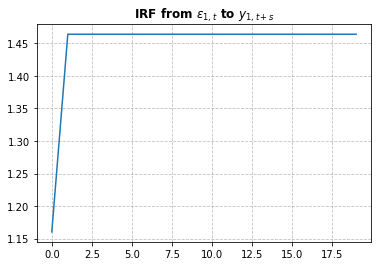

In [24]:
import matplotlib.pyplot as plt

plt.plot(range(0,K), IRF_11)
plt.title('IRF from $\epsilon_{1,t}$ to $y_{1,t+s}$', fontweight='bold')
plt.grid(linestyle='--', color='gray', alpha=0.5)
plt.show()

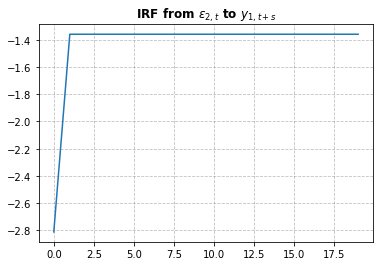

In [25]:
plt.plot(range(0,K), IRF_12)
plt.title('IRF from $\epsilon_{2,t}$ to $y_{1,t+s}$', fontweight='bold')
plt.grid(linestyle='--', color='gray', alpha=0.5)
plt.show()

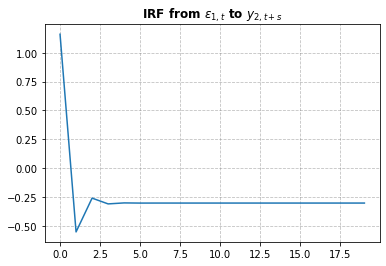

In [26]:
plt.plot(range(0,K), IRF_21)
plt.title('IRF from $\epsilon_{1,t}$ to $y_{2,t+s}$', fontweight='bold')
plt.grid(linestyle='--', color='gray', alpha=0.5)
plt.show()

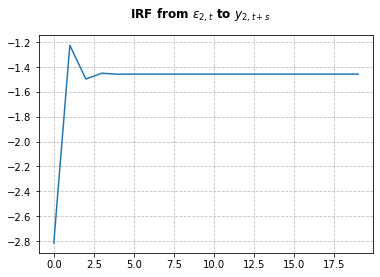

In [27]:
plt.plot(range(0,K), IRF_22)
plt.suptitle('IRF from $\epsilon_{2,t}$ to $y_{2,t+s}$', fontweight='bold')
plt.grid(linestyle='--', color='gray', alpha=0.5)
plt.show()